<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.137109,73.445892,47.625332,-0.000105,183.208228,183.208360,-0.000132
1,0.0,1.0,77.176131,61.552657,96.368892,-0.000155,245.097525,245.097647,-0.000122
2,0.0,2.0,44.200190,94.240934,28.495448,-0.000036,176.936535,176.936556,-0.000020
3,0.0,3.0,86.939773,49.714267,47.155688,-0.000207,193.809520,193.809905,-0.000385
4,0.0,4.0,60.785022,42.068208,84.820274,-0.000402,197.673102,197.673565,-0.000463
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.544015,63.310443,77.353687,-0.000107,207.208038,207.208141,-0.000103
119996,999.0,116.0,58.500439,98.146473,29.941180,0.000122,196.588214,196.588052,0.000162
119997,999.0,117.0,28.464715,65.199883,50.462313,0.000556,154.127467,154.126764,0.000703
119998,999.0,118.0,45.399134,24.846920,90.687204,0.000176,170.933435,170.933217,0.000218


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.137109,73.445892,47.625332,-0.000105,183.208228,183.208360,-0.000132
1,0.0,1.0,77.176131,61.552657,96.368892,-0.000155,245.097525,245.097647,-0.000122
2,0.0,2.0,44.200190,94.240934,28.495448,-0.000036,176.936535,176.936556,-0.000020
3,0.0,3.0,86.939773,49.714267,47.155688,-0.000207,193.809520,193.809905,-0.000385
4,0.0,4.0,60.785022,42.068208,84.820274,-0.000402,197.673102,197.673565,-0.000463
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.544015,63.310443,77.353687,-0.000107,207.208038,207.208141,-0.000103
119996,999.0,116.0,58.500439,98.146473,29.941180,0.000122,196.588214,196.588052,0.000162
119997,999.0,117.0,28.464715,65.199883,50.462313,0.000556,154.127467,154.126764,0.000703
119998,999.0,118.0,45.399134,24.846920,90.687204,0.000176,170.933435,170.933217,0.000218


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.137109  73.445892  47.625332 -0.000105  183.208228   
      1.0    77.176131  61.552657  96.368892 -0.000155  245.097525   
      2.0    44.200190  94.240934  28.495448 -0.000036  176.936535   
      3.0    86.939773  49.714267  47.155688 -0.000207  193.809520   
      4.0    60.785022  42.068208  84.820274 -0.000402  197.673102   
...                ...        ...        ...       ...         ...   
999.0 115.0  56.544015  63.310443  77.353687 -0.000107  207.208038   
      116.0  58.500439  98.146473  29.941180  0.000122  196.588214   
      117.0  28.464715  65.199883  50.462313  0.000556  154.127467   
      118.0  45.399134  24.846920  90.687204  0.000176  170.933435   
      119.0  87.246410  53.922620  35.379604 -0.000514  186.548120   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    183.208360 -0.000132  
      1.0    245.097647 -0.000122  
      2.0    176.936556 -0.000020  
      3.0    193.809905 -0.000385  
      4.0    197.673565 -0.000463  
...                 ...       ...  
999.0 115.0  207.208141 -0.000103  
      116.0  196.588052  0.000162  
      117.0  154.126764  0.000703  
      118.0  170.933217  0.000218  
      119.0  186.548711 -0.000591  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.137109  73.445892  47.625332 -0.000105  183.208228   
      1.0    77.176131  61.552657  96.368892 -0.000155  245.097525   
      2.0    44.200190  94.240934  28.495448 -0.000036  176.936535   
      3.0    86.939773  49.714267  47.155688 -0.000207  193.809520   
      4.0    60.785022  42.068208  84.820274 -0.000402  197.673102   
...                ...        ...        ...       ...         ...   
999.0 115.0  56.544015  63.310443  77.353687 -0.000107  207.208038   
      116.0  58.500439  98.146473  29.941180  0.000122  196.588214   
      117.0  28.464715  65.199883  50.462313  0.000556  154.127467   
      118.0  45.399134  24.846920  90.687204  0.000176  170.933435   
      119.0  87.246410  53.922620  35.379604 -0.000514  186.548120   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    183.208360 -0.000132  
      1.0    245.097647 -0.000122  
      2.0    176.936556 -0.000020  
      3.0    193.809905 -0.000385  
      4.0    197.673565 -0.000463  
...                 ...       ...  
999.0 115.0  207.208141 -0.000103  
      116.0  196.588052  0.000162  
      117.0  154.126764  0.000703  
      118.0  170.933217  0.000218  
      119.0  186.548711 -0.000591  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.137109,73.445892,47.625332,-0.000105,183.208228,183.208360,-0.000132
1,0.0,1.0,77.176131,61.552657,96.368892,-0.000155,245.097525,245.097647,-0.000122
2,0.0,2.0,44.200190,94.240934,28.495448,-0.000036,176.936535,176.936556,-0.000020
3,0.0,3.0,86.939773,49.714267,47.155688,-0.000207,193.809520,193.809905,-0.000385
4,0.0,4.0,60.785022,42.068208,84.820274,-0.000402,197.673102,197.673565,-0.000463
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.544015,63.310443,77.353687,-0.000107,207.208038,207.208141,-0.000103
119996,999.0,116.0,58.500439,98.146473,29.941180,0.000122,196.588214,196.588052,0.000162
119997,999.0,117.0,28.464715,65.199883,50.462313,0.000556,154.127467,154.126764,0.000703
119998,999.0,118.0,45.399134,24.846920,90.687204,0.000176,170.933435,170.933217,0.000218


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    52.137109  73.445892  47.625332 -0.000105  183.208228   
      1.0    77.176131  61.552657  96.368892 -0.000155  245.097525   
      2.0    44.200190  94.240934  28.495448 -0.000036  176.936535   
      3.0    86.939773  49.714267  47.155688 -0.000207  193.809520   
      4.0    60.785022  42.068208  84.820274 -0.000402  197.673102   
...                ...        ...        ...       ...         ...   
999.0 115.0  56.544015  63.310443  77.353687 -0.000107  207.208038   
      116.0  58.500439  98.146473  29.941180  0.000122  196.588214   
      117.0  28.464715  65.199883  50.462313  0.000556  154.127467   
      118.0  45.399134  24.846920  90.687204  0.000176  170.933435   
      119.0  87.246410  53.922620  35.379604 -0.000514  186.548120   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    183.208360 -0.000132  
      1.0    245.097647 -0.000122  
      2.0    176.936556 -0.000020  
      3.0    193.809905 -0.000385  
      4.0    197.673565 -0.000463  
...                 ...       ...  
999.0 115.0  207.208141 -0.000103  
      116.0  196.588052  0.000162  
      117.0  154.126764  0.000703  
      118.0  170.933217  0.000218  
      119.0  186.548711 -0.000591  

[120000 rows x 7 columns]

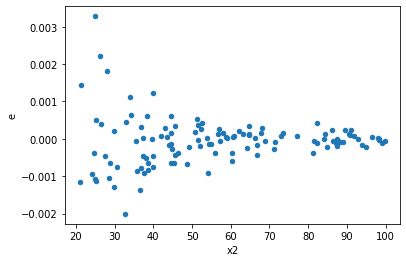

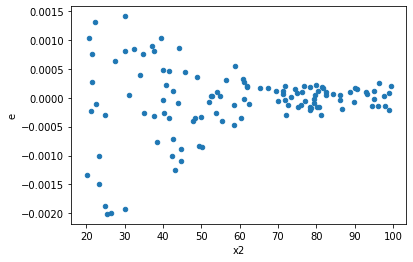

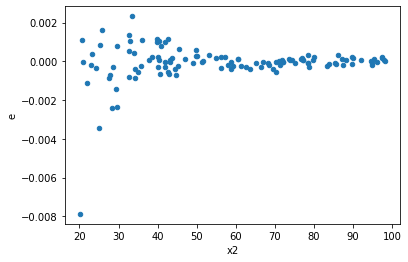

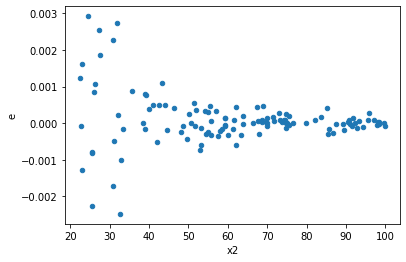

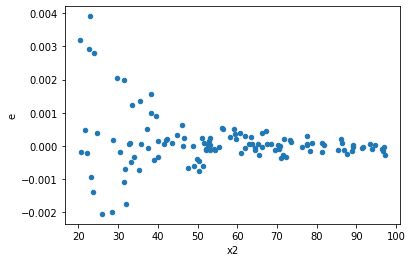

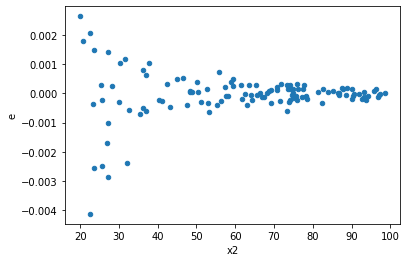

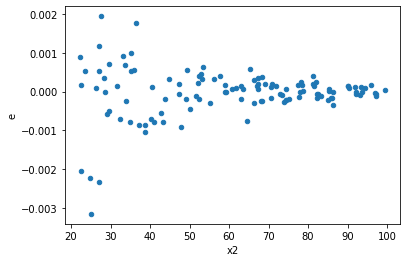

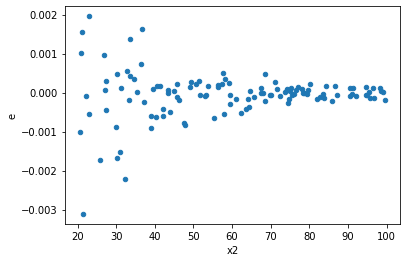

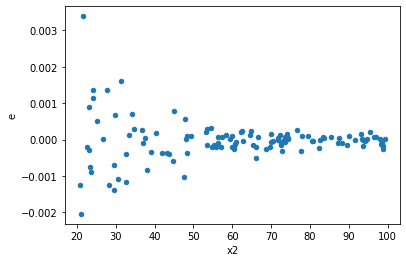

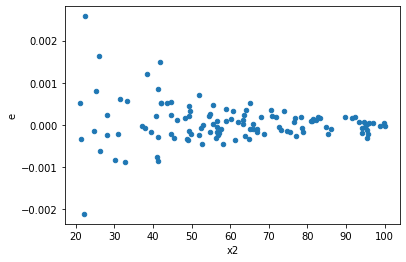

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
12.0,45.0,45.0,3.785440402547975e-05,6.732341813057074e-05,8.412089783439945e-07,1.4960759584571276e-06,1.7784831082073154,0.056454061818205226,0.9717729690908974,0.028227030909102613,Reject005=1 : Homoscedasticity
38.0,45.0,45.0,3.157129029579425e-05,4.652376735536111e-05,7.015842287954278e-07,1.0338614967858025e-06,1.4736099449682214,0.1973152017535693,0.9013423991232153,0.09865760087678466,Reject005=1 : Homoscedasticity
100.0,45.0,45.0,2.3614128302545035e-05,3.76619244200891e-05,5.24758406723223e-07,8.369316537797577e-07,1.5948894635263773,0.12111940633368068,0.9394402968331597,0.06055970316684034,Reject005=1 : Homoscedasticity
158.0,45.0,45.0,3.109548256810987e-05,3.9387216594694966e-05,6.910107237357748e-07,8.752714798821104e-07,1.2666539748474182,0.4309678218417943,0.7845160890791029,0.21548391092089714,Reject005=1 : Homoscedasticity
191.0,45.0,45.0,1.972734818618386e-05,2.530200308767226e-05,4.3838551524853025e-07,5.622667352816058e-07,1.2825851122449714,0.40706184964374503,0.7964690751781275,0.20353092482187252,Reject005=1 : Homoscedasticity
216.0,45.0,45.0,1.076830278113176e-05,1.278685230103786e-05,2.392956173584836e-07,2.841522733563969e-07,1.187452894010652,0.5668288771110643,0.7165855614444678,0.28341443855553217,Reject005=1 : Homoscedasticity
378.0,45.0,45.0,1.5391540352493953e-05,1.5458199630332423e-05,3.420342300554212e-07,3.4351554734072053e-07,1.0043309036205508,0.988499192494587,0.5057504037527065,0.4942495962472935,Reject005=1 : Homoscedasticity
400.0,45.0,45.0,2.094675193286642e-05,2.181108734351147e-05,4.6548337628592045e-07,4.846908298558104e-07,1.0412634576193585,0.892717270988117,0.5536413645059415,0.4463586354940585,Reject005=1 : Homoscedasticity
415.0,45.0,45.0,2.0495073634024818e-05,6.0079742518023384e-05,4.5544608075610707e-07,1.3351053892894086e-06,2.9314235991951856,0.0004539859452077355,0.9997730070273961,0.00022699297260386775,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,2.2575590207189064e-05,1.0096983406879405e-05,5.016797823819792e-07,2.2437740904176455e-07,0.44725224519995405,0.008070026370328125,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3.4360926018618194e-05,1.2217334703911647e-05,7.63576133747071e-07,2.7149632675359217e-07,0.3555589478959846,0.0007327645922889566,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,3.580275259785045e-05,4.55630753866908e-06,7.956167243966766e-07,1.0125127863709066e-07,0.12726137539890256,1.7337961236629815e-10,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,3.274772642055354e-05,8.35023571177782e-06,7.277272537900787e-07,1.855607935950627e-07,0.25498673112576575,1.0914503756578473e-05,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,3.550840472003213e-05,5.697080331027161e-06,7.890756604451585e-07,1.266017851339369e-07,0.16044315073983434,9.192660830009267e-09,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2.9650873094011506e-05,7.045173247104794e-06,6.589082909780334e-07,1.5655940549121765e-07,0.23760424270702796,4.0382185772450175e-06,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,1.7888391994587616e-05,2.273336439411773e-06,3.9751982210194705e-07,5.051858754248384e-08,0.12708444895995138,1.6917074898158084e-10,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,5.3214419323601736e-05,1.0134164170943477e-05,1.1825426516355942e-06,2.2520364824318838e-07,0.1904401908309231,1.4597803058560058e-07,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,3.6216425023589525e-05,5.7896297157578776e-06,8.048094449686561e-07,1.2865843812795284e-07,0.1598619883654118,8.655503944797631e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    937
Reject005=1 : Homoscedasticity       63
Name: Result_test, dtype: int64